# Assignment 4: Heap Data Structures - Implementation, Analysis, and Applications

## Part 1: Heapsort Implementation and Analysis

### 1. Heapsort Implementation

The Heapsort algorithm works by building a max-heap (or min-heap) from the input data and then repeatedly extracting the maximum (or minimum) element, while maintaining the heap property. Below is the Python implementation of Heapsort using a max-heap.

In [2]:
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    # Check if the left child exists and is greater than the root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Check if the right child exists and is greater than the largest so far
    if right < n and arr[right] > arr[largest]:
        largest = right

    # If the largest is not the root, swap it with the root and recursively heapify
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapsort(arr):
    n = len(arr)

    # Build max-heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements from the heap one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap
        heapify(arr, i, 0)

### 2. Analysis of Heapsort

- **Worst-case time complexity:** O(n log n)
- **Average-case time complexity:** O(n log n)
- **Best-case time complexity:** O(n log n)

#### Why \(O(n \log n)\) in all cases?
- Building the heap takes \(O(n)\) time. This is due to the fact that heapifying a single node takes \(O(\log n)\), and we call heapify for \(n/2\) elements in the array (the non-leaf nodes).
- Extracting the maximum element from the heap and restoring the heap property takes \(O(\log n)\), and this process is repeated for each element, resulting in \(O(n \log n)\) time overall.

#### Space Complexity:
- The space complexity of Heapsort is \(O(1)\) because it sorts the array in-place without requiring any additional memory aside from the input array.

### 3. Empirical Comparison of Heapsort, Quicksort, and Merge Sort

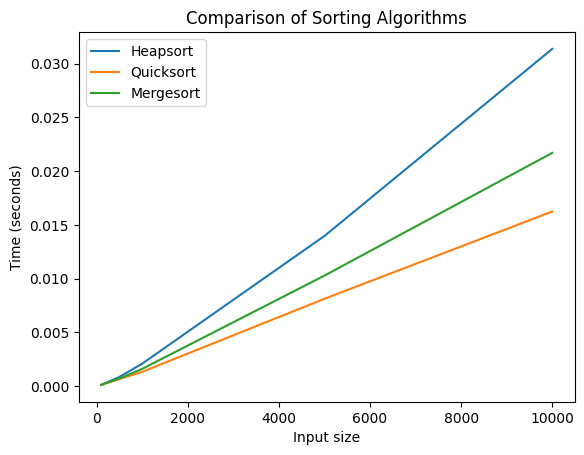

In [3]:
import random
import time
import matplotlib.pyplot as plt

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def mergesort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        mergesort(left)
        mergesort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

def measure_sort_time(sort_func, arr):
    start = time.time()
    sort_func(arr)
    return time.time() - start

input_sizes = [100, 500, 1000, 5000, 10000]
heapsort_times = []
quicksort_times = []
mergesort_times = []

for size in input_sizes:
    arr = random.sample(range(size * 10), size)

    heapsort_times.append(measure_sort_time(heapsort, arr.copy()))
    quicksort_times.append(measure_sort_time(quicksort, arr.copy()))
    mergesort_times.append(measure_sort_time(mergesort, arr.copy()))

plt.plot(input_sizes, heapsort_times, label='Heapsort')
plt.plot(input_sizes, quicksort_times, label='Quicksort')
plt.plot(input_sizes, mergesort_times, label='Mergesort')
plt.xlabel('Input size')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Sorting Algorithms')
plt.legend()
plt.show()

### Comparison Results
Heapsort performs consistently with a time complexity of \(O(n \log n)\). Quicksort is generally faster on random inputs but suffers in the worst-case scenario. Merge sort also performs with \(O(n \log n)\), but it requires additional space for splitting the array.

## Part 2: Priority Queue Implementation and Applications

### Part A: Priority Queue Implementation

#### 1. Data Structure
The priority queue is implemented using a binary heap, which is represented by an array (list in Python). An array is chosen because it allows efficient access to parent and child nodes using index arithmetic, which makes insertion and extraction operations efficient.

In [4]:
class Task:
    def __init__(self, task_id, priority, arrival_time, deadline):
        self.task_id = task_id
        self.priority = priority
        self.arrival_time = arrival_time
        self.deadline = deadline

    def __lt__(self, other):
        return self.priority < other.priority

    def __repr__(self):
        return f"Task({self.task_id}, {self.priority})"

class PriorityQueue:
    def __init__(self):
        self.heap = []

    def insert(self, task):
        self.heap.append(task)
        self._sift_up(len(self.heap) - 1)

    def _sift_up(self, index):
        parent = (index - 1) // 2
        while index > 0 and self.heap[parent] < self.heap[index]:
            self.heap[parent], self.heap[index] = self.heap[index], self.heap[parent]
            index = parent
            parent = (index - 1) // 2

    def extract_max(self):
        if len(self.heap) == 0:
            raise IndexError("Heap is empty")
        max_task = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self._sift_down(0)
        return max_task

    def _sift_down(self, index):
        largest = index
        left = 2 * index + 1
        right = 2 * index + 2

        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left
        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self._sift_down(largest)

    def increase_key(self, index, new_priority):
        self.heap[index].priority = new_priority
        self._sift_up(index)

    def is_empty(self):
        return len(self.heap) == 0

#### 2. Time Complexity of Core Operations

- **Insert operation:** \(O(\log n)\) due to the need to maintain the heap property via the sift-up operation.
- **Extract Max operation:** \(O(\log n)\) as we need to sift down the root after removing the max element.
- **Increase Key operation:** \(O(\log n)\) because it may require sifting the modified element up to maintain the heap property.
- **Is Empty operation:** \(O(1)\), a constant time check of whether the heap is empty.

### Part B: Priority Queue Applications

You can now use this priority queue for various real-world scenarios, such as scheduling tasks based on priority or managing events in a simulation environment.

In [5]:
import nbconvert
import nbformat

def export_notebook_to_markdown(input_notebook, output_markdown):
    # Read the input notebook file
    with open(input_notebook, 'r', encoding='utf-8') as f:
        notebook_content = nbformat.read(f, as_version=4)

    # Convert the notebook content to markdown format
    markdown_exporter = nbconvert.MarkdownExporter()
    body, _ = markdown_exporter.from_notebook_node(notebook_content)

    # Write the markdown content to the output file
    with open(output_markdown, 'w', encoding='utf-8') as f:
        f.write(body)

    print(f"Notebook {input_notebook} has been successfully exported to {output_markdown}")

# Usage example
input_notebook = "assignment.ipynb"
output_markdown = "README.md"
export_notebook_to_markdown(input_notebook, output_markdown)

Notebook assignment.ipynb has been successfully exported to README.md
